In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

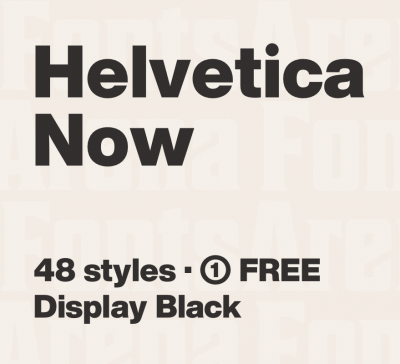

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

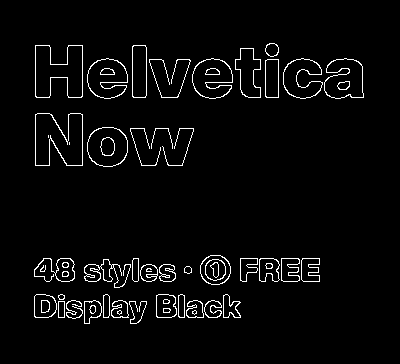

In [0]:
cv2_imshow(edges)

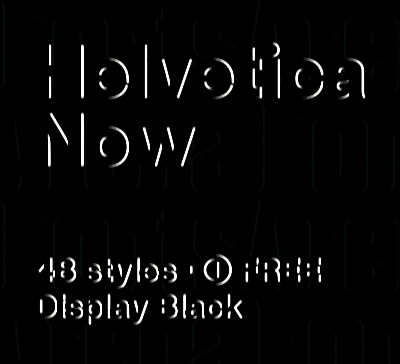

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

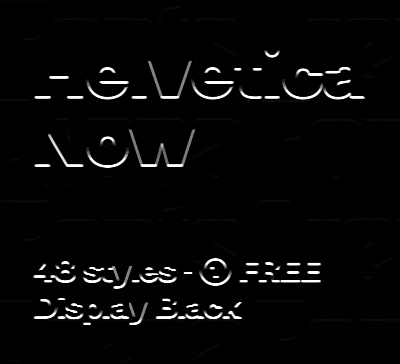

In [0]:
#This is horizontal edge detector. This will identify for the distinguishable change between the pixel values one below the other. 
#Numbers in the kernel below are obtained by flipping the vertical edge detector matrix shown above. We can also use all 1s in the first row 
#and -1s in the last row of filter. That would also work. 
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

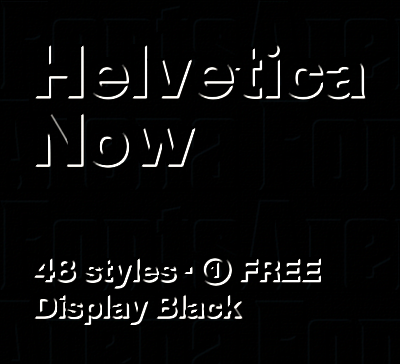

In [0]:
#This is 45 degree angle detector. The numbers in the kernel has 0 values diagonally and all dark values(represented by -1) to the top and 
#bright values(represented by 1) to the bottom of diagonal. We can also flip the -1s with 1s and vice versa. That would work as well. 
kernel = np.float32([[-1,-1,0],[-1,0,1],[0,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

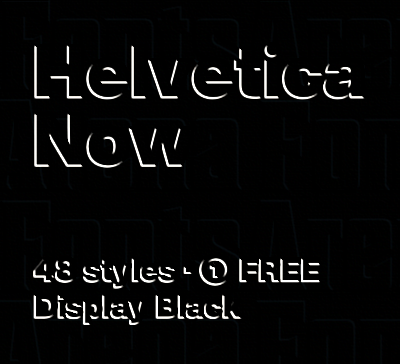

In [0]:
#This is 135 degree angle detector. similar to 45 degree detector mentioned above.The only diffrenct is 0 diagonal is flipped horizontally.

kernel = np.float32([[0,-1,-1],[1,0,-1],[1,1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

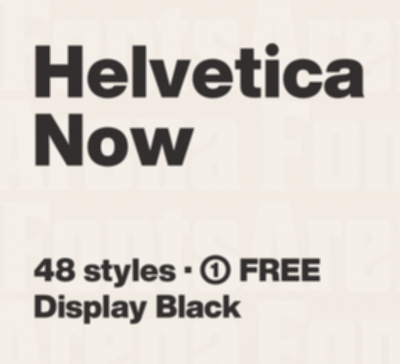

In [0]:
#This is the Blur filter. values in the kernel are choosen to be 1/9 to get the average of all 1s in the filter. 
kernel = np.float32([[0.111,0.111,0.111],[0.111,0.111,0.111],[0.111,0.111,0.111]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

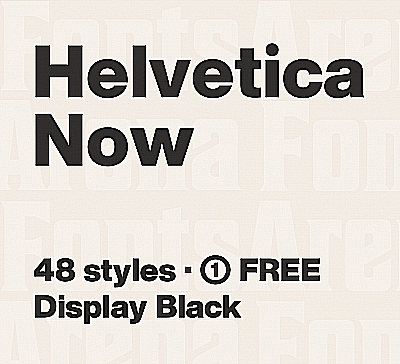

In [0]:
#This is the Sharpen filter. values in the kernel are choosen such that middle value is higher compared to outer ones, 
#to emphasise the middle pixel during convolution
kernel = np.float32([[-1,0,-1],[0,5,0],[-1,0,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

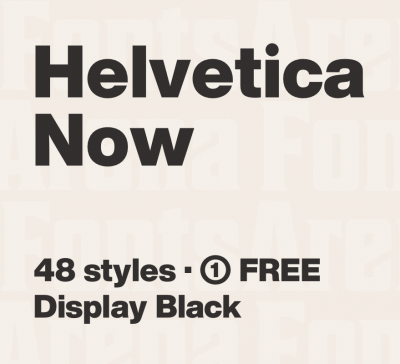

In [0]:
#This is the Identity function. It does not extract any faature. But happens to decrease the resolution 
#of image by 2 pixels since we use 3X3 kernel.
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)